In [1]:
!git clone https://github.com/Harsh-Kesharwani/stable-diffusion.git

Cloning into 'stable-diffusion'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 74 (delta 29), reused 60 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 657.05 KiB | 6.57 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
cd stable-diffusion

/kaggle/working/stable-diffusion


In [3]:
!wget https://huggingface.co/Envvi/Inkpunk-Diffusion/resolve/main/inkpunk-diffusion-v1.ckpt?download=true 

--2025-05-13 03:00:24--  https://huggingface.co/Envvi/Inkpunk-Diffusion/resolve/main/inkpunk-diffusion-v1.ckpt?download=true
Resolving huggingface.co (huggingface.co)... 18.239.50.80, 18.239.50.49, 18.239.50.103, ...
Connecting to huggingface.co (huggingface.co)|18.239.50.80|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/a7/28/a72817c5080f64c93a3d023d3c5960b9ab8347c9360872d33c74d90fdf3d6bc9/629ddef95988fd88760808067c8b92625061937e153ab8eff99c933c1516f5d8?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27inkpunk-diffusion-v1.ckpt%3B+filename%3D%22inkpunk-diffusion-v1.ckpt%22%3B&Expires=1747108824&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NzEwODgyNH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9hNy8yOC9hNzI4MTdjNTA4MGY2NGM5M2EzZDAyM2QzYzU5NjBiOWFiODM0N2M5MzYwODcyZDMzYzc0ZDkwZmRmM2Q2YmM5LzYyOWRkZWY5NTk4OGZkODg3NjA4MDgwNjdjOGI5MjYyNTA2MTkzN2UxNTNhYjhlZmY5OW

In [4]:
mv 'inkpunk-diffusion-v1.ckpt?download=true' inkpunk-diffusion-v1.ckpt

In [5]:
!git pull

Already up to date.


Using device: cuda


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


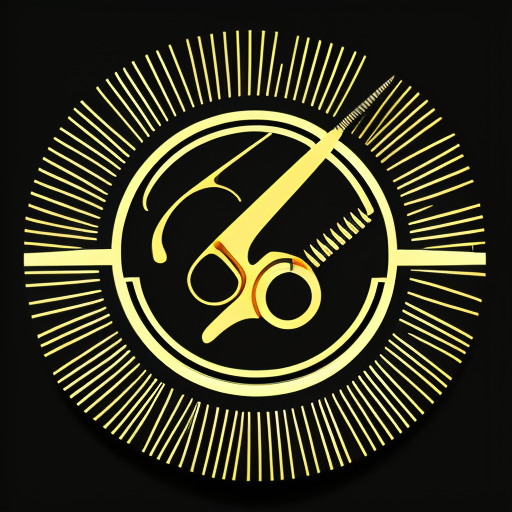

In [ ]:
import model
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

from IPython.display import display

DEVICE="cuda"

ALLOW_CUDA=True
ALLOW_MPS=False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("vocab.json", merges_file="merges.txt")
model_file = "inkpunk-diffusion-v1.ckpt"
models = model.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE
prompt = "a logo of barbershop hair salon, Scissors in the middle of the picture from the rings of which the branches of the plant come out, black background, gold foreground, minimalism, modern"
uncond_prompt = ""  # Optional: negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14
input_image = None  # No image for Text-to-Image
strength = 1  # Use 1 as a default value for Text-to-Image



## IMAGE TO IMAGE
# image_path = "dog.jpg"  # Path to input image
# prompt = "A dog wearing sunglasses"
# uncond_prompt = ""  # Optional: negative prompt
# do_cfg = True
# cfg_scale = 8  # min: 1, max: 14
# input_image = Image.open(image_path)
# strength = 0.5  # Strength to control how much transformation occurs



## SAMPLER
sampler = "ddpm"
num_inference_steps = 100
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cuda",
    tokenizer=tokenizer,
)

# print(output_image)

output_pil = Image.fromarray(output_image)

# # Show the image
# output_pil.show()
display(output_pil)

# Save the image (optional)
output_pil.save("output.png")

In [ ]:
import torch
import gc

# Delete all tensors and force garbage collection
torch.cuda.empty_cache()           # Clears unused memory
gc.collect()                       # Python garbage collection

# If you want to delete specific variables:
for obj in dir():
    if 'cuda' in str(locals()[obj]):
        del locals()[obj]
gc.collect()
torch.cuda.empty_cache()
